## Import Lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
tf.random.set_seed(42)
np.random.seed(42)
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Data and checking

In [3]:
data = pd.read_csv(
    'data/bank-full.csv',sep=';'
)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
data.groupby(by='job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


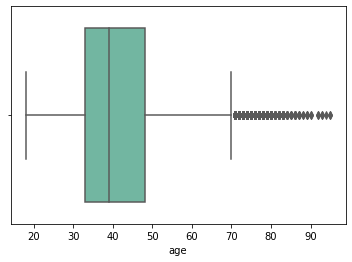

In [ ]:
sns.boxplot(data=data, x='age', palette='Set2')

## One Hot Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [8]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data.job)
integer_encoded

array([4, 9, 2, ..., 5, 1, 2])

In [9]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
onehot_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
inverted = label_encoder.inverse_transform([np(onehot_encoded[0, :])])
inverted

In [10]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
level_data=encoder.fit_transform(data.job)
level_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [13]:
data1 = pd.get_dummies(data, columns=['job','marital','education','default','housing','loan','contact','month','poutcome','y'])
data1

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [14]:
data1.describe().T
data1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'],
      dtype='object')

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(20, 10))
sns.pairplot(data1, hue='y')

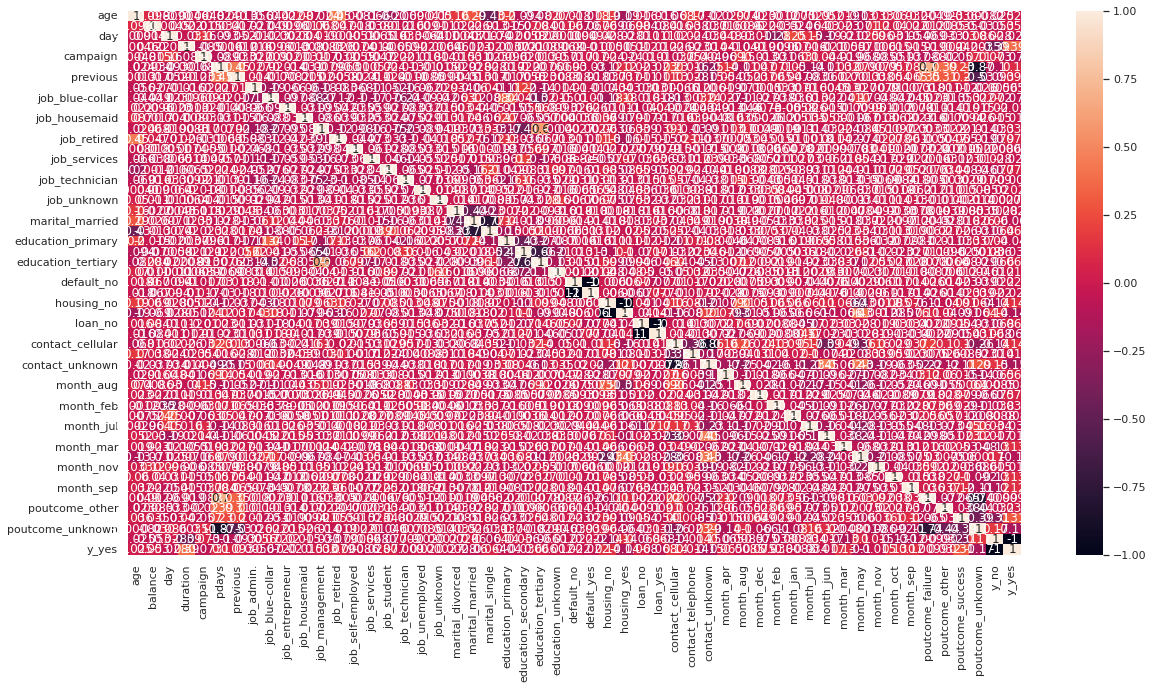

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data1.corr(), annot=True)

## Traning and Test Data Set

In [22]:
data1.drop(columns=['y_no','y_yes'])

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    data1.drop(columns=['y_no','y_yes']), data1[['y_no']], test_size=0.2, random_state=42
)

In [28]:
data1.drop(columns=['y_no','y_yes']).shape

(45211, 51)

In [24]:
xtrain

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3344,41,849,15,72,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
17965,49,1415,30,269,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18299,42,3842,31,130,4,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10221,37,-119,11,375,11,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32192,56,3498,15,264,2,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,1059,18,2093,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
44732,23,508,8,210,1,92,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
38158,34,1317,15,239,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
860,33,165,7,111,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Neural Network Modeling

## Single Neuron

In [29]:
normalizer = tf.keras.layers.Normalization(input_shape=[51,], axis=-1)
normalizer.adapt(xtrain)

In [30]:
model_single_neuron = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.relu)
])

In [31]:
model_single_neuron.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.MSE,
    metrics=['mse', 'mae']
)

In [32]:
model_single_neuron.fit(
    x=xtrain, y=ytrain,
    epochs=20, verbose=2,
    validation_split=0.2
)

Epoch 1/20
905/905 - 2s - loss: 0.2488 - mse: 0.2488 - mae: 0.3275 - val_loss: 0.1566 - val_mse: 0.1566 - val_mae: 0.2379 - 2s/epoch - 2ms/step
Epoch 2/20
905/905 - 1s - loss: 0.1559 - mse: 0.1559 - mae: 0.2308 - val_loss: 0.1559 - val_mse: 0.1559 - val_mae: 0.2305 - 1s/epoch - 1ms/step
Epoch 3/20
905/905 - 1s - loss: 0.1557 - mse: 0.1557 - mae: 0.2301 - val_loss: 0.1563 - val_mse: 0.1563 - val_mae: 0.2382 - 1s/epoch - 1ms/step
Epoch 4/20
905/905 - 1s - loss: 0.1559 - mse: 0.1559 - mae: 0.2310 - val_loss: 0.1567 - val_mse: 0.1567 - val_mae: 0.2368 - 1s/epoch - 1ms/step
Epoch 5/20
905/905 - 1s - loss: 0.1558 - mse: 0.1558 - mae: 0.2303 - val_loss: 0.1565 - val_mse: 0.1565 - val_mae: 0.2325 - 1s/epoch - 1ms/step
Epoch 6/20
905/905 - 1s - loss: 0.1558 - mse: 0.1558 - mae: 0.2303 - val_loss: 0.1561 - val_mse: 0.1561 - val_mae: 0.2291 - 1s/epoch - 1ms/step
Epoch 7/20
905/905 - 1s - loss: 0.1557 - mse: 0.1557 - mae: 0.2306 - val_loss: 0.1563 - val_mse: 0.1563 - val_mae: 0.2297 - 1s/epoch - 1

In [33]:
model_single_neuron.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 51)               103       
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 52        
                                                                 
Total params: 155
Trainable params: 52
Non-trainable params: 103
_________________________________________________________________


In [34]:
history = pd.DataFrame(model_single_neuron.history.history)
history

,loss,mse,mae,val_loss,val_mse,val_mae
0,0.248825,0.248825,0.327452,0.156578,0.156578,0.237881
1,0.155852,0.155852,0.230780,0.155886,0.155886,0.230538
2,0.155731,0.155731,0.230116,0.156330,0.156330,0.238165
3,0.155944,0.155944,0.230957,0.156660,0.156660,0.236792
4,0.155759,0.155759,0.230270,0.156488,0.156488,0.232488
5,0.155775,0.155775,0.230297,0.156109,0.156109,0.229145
6,0.155668,0.155668,0.230557,0.156262,0.156262,0.229670
7,0.155443,0.155443,0.230533,0.156964,0.156964,0.235044
8,0.155832,0.155832,0.230277,0.156362,0.156362,0.233534
9,0.155745,0.155745,0.230430,0.155989,0.155989,0.230978


In [35]:
history.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [36]:
history['mse']

0     0.248825
1     0.155852
2     0.155731
3     0.155944
4     0.155759
5     0.155775
6     0.155668
7     0.155443
8     0.155832
9     0.155745
10    0.155744
11    0.155730
12    0.155880
13    0.155793
14    0.155824
15    0.155849
16    0.155755
17    0.155809
18    0.155892
19    0.155849
Name: mse, dtype: float64

In [37]:
def plotNN(model):
    history = pd.DataFrame(model.history.history)
    plt.figure(figsize=(18, 10))
    plt.plot(history.index.values, history['loss'], label='Training Error', color='darkorange', linewidth=3)
    plt.plot(history.index.values, history['val_loss'], label='Validation Error', color='lightgreen', linewidth=3)
    plt.legend()
    plt.show()

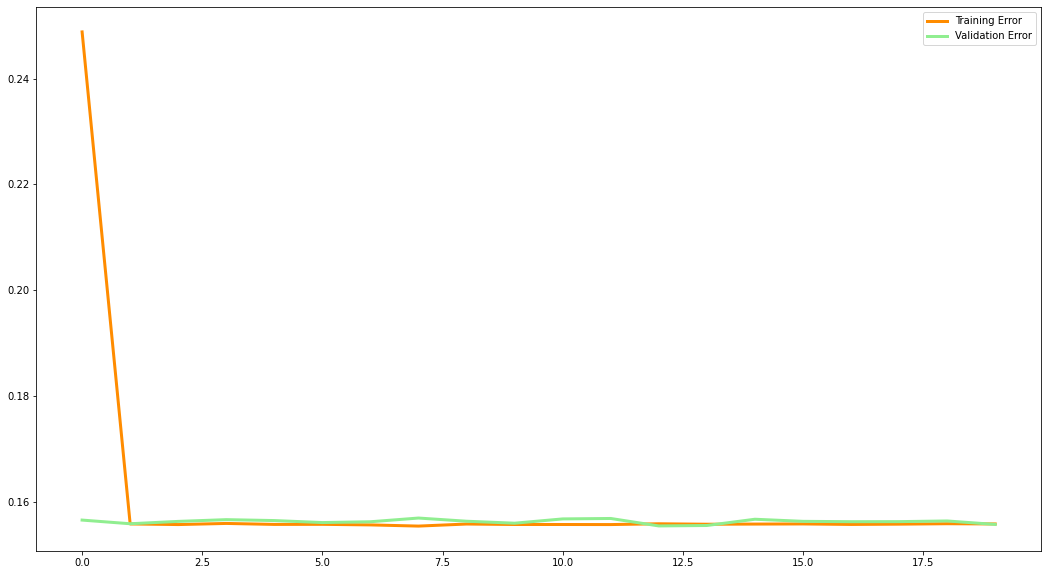

In [38]:
plotNN(model_single_neuron)

## Shallow Neural Network

In [39]:
# Defining The Structure
shallowNN = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.relu)
])

In [40]:
shallowNN .compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.MSE,
    metrics=['mse']
)

In [41]:
shallowNN .fit(
    x=xtrain, y=ytrain,
    epochs=20, verbose=2,
    validation_split=0.2
)

Epoch 1/20
905/905 - 3s - loss: 0.1347 - mse: 0.1347 - val_loss: 0.0920 - val_mse: 0.0920 - 3s/epoch - 3ms/step
Epoch 2/20
905/905 - 2s - loss: 0.0841 - mse: 0.0841 - val_loss: 0.0813 - val_mse: 0.0813 - 2s/epoch - 2ms/step
Epoch 3/20
905/905 - 1s - loss: 0.0776 - mse: 0.0776 - val_loss: 0.0766 - val_mse: 0.0766 - 1s/epoch - 1ms/step
Epoch 4/20
905/905 - 1s - loss: 0.0754 - mse: 0.0754 - val_loss: 0.0741 - val_mse: 0.0741 - 1s/epoch - 1ms/step
Epoch 5/20
905/905 - 1s - loss: 0.0735 - mse: 0.0735 - val_loss: 0.0745 - val_mse: 0.0745 - 1s/epoch - 2ms/step
Epoch 6/20
905/905 - 1s - loss: 0.0726 - mse: 0.0726 - val_loss: 0.0724 - val_mse: 0.0724 - 1s/epoch - 1ms/step
Epoch 7/20
905/905 - 1s - loss: 0.0716 - mse: 0.0716 - val_loss: 0.0722 - val_mse: 0.0722 - 1s/epoch - 1ms/step
Epoch 8/20
905/905 - 1s - loss: 0.0713 - mse: 0.0713 - val_loss: 0.0735 - val_mse: 0.0735 - 1s/epoch - 1ms/step
Epoch 9/20
905/905 - 1s - loss: 0.0709 - mse: 0.0709 - val_loss: 0.0721 - val_mse: 0.0721 - 1s/epoch - 1

In [42]:
shallowNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 51)               103       
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                3328      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,496
Trainable params: 3,393
Non-trainable params: 103
_________________________________________________________________


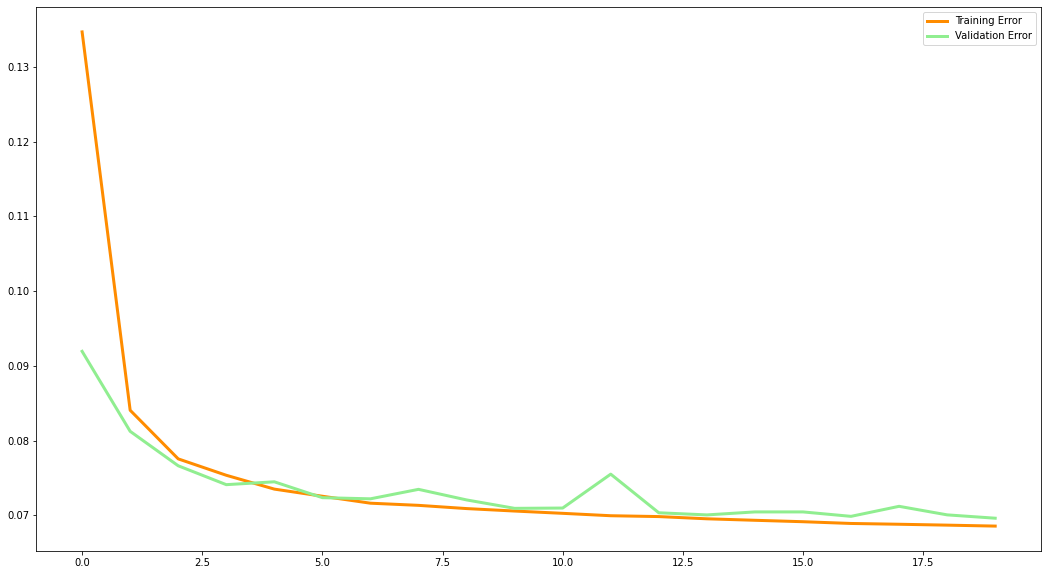

In [43]:
plotNN(shallowNN)

## Deep Neural Network

In [44]:
# Defining The Structure
deepNN = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=28, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.relu)
])

In [45]:
deepNN .compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.MSE,
    metrics=['mse']
)

In [46]:
deepNN .fit(
    x=xtrain, y=ytrain,
    epochs=20, verbose=2,
    validation_split=0.2
)

Epoch 1/20
905/905 - 2s - loss: 0.1281 - mse: 0.1281 - val_loss: 0.0868 - val_mse: 0.0868 - 2s/epoch - 2ms/step
Epoch 2/20
905/905 - 1s - loss: 0.0805 - mse: 0.0805 - val_loss: 0.0848 - val_mse: 0.0848 - 1s/epoch - 2ms/step
Epoch 3/20
905/905 - 1s - loss: 0.0755 - mse: 0.0755 - val_loss: 0.0762 - val_mse: 0.0762 - 1s/epoch - 2ms/step
Epoch 4/20
905/905 - 1s - loss: 0.0733 - mse: 0.0733 - val_loss: 0.0743 - val_mse: 0.0743 - 1s/epoch - 2ms/step
Epoch 5/20
905/905 - 1s - loss: 0.0719 - mse: 0.0719 - val_loss: 0.0737 - val_mse: 0.0737 - 1s/epoch - 2ms/step
Epoch 6/20
905/905 - 2s - loss: 0.0708 - mse: 0.0708 - val_loss: 0.0723 - val_mse: 0.0723 - 2s/epoch - 2ms/step
Epoch 7/20
905/905 - 2s - loss: 0.0699 - mse: 0.0699 - val_loss: 0.0718 - val_mse: 0.0718 - 2s/epoch - 2ms/step
Epoch 8/20
905/905 - 1s - loss: 0.0695 - mse: 0.0695 - val_loss: 0.0731 - val_mse: 0.0731 - 1s/epoch - 2ms/step
Epoch 9/20
905/905 - 1s - loss: 0.0689 - mse: 0.0689 - val_loss: 0.0714 - val_mse: 0.0714 - 1s/epoch - 1

In [47]:
deepNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 51)               103       
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                3328      
                                                                 
 dense_5 (Dense)             (None, 28)                1820      
                                                                 
 dense_6 (Dense)             (None, 1)                 29        
                                                                 
Total params: 5,280
Trainable params: 5,177
Non-trainable params: 103
_________________________________________________________________


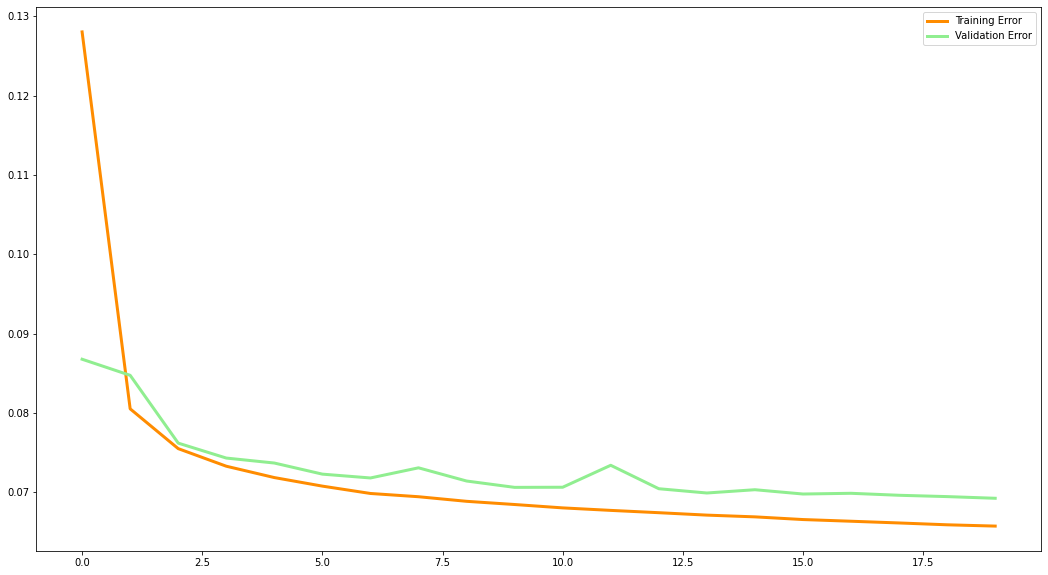

In [48]:
plotNN(deepNN)

## Complex Model

In [49]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    data1.drop(columns=['y_no','y_yes']), data1[['y_no']], test_size=0.2, random_state=42
)

In [50]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 3344 to 15795
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  36168 non-null  int64
 1   balance              36168 non-null  int64
 2   day                  36168 non-null  int64
 3   duration             36168 non-null  int64
 4   campaign             36168 non-null  int64
 5   pdays                36168 non-null  int64
 6   previous             36168 non-null  int64
 7   job_admin.           36168 non-null  uint8
 8   job_blue-collar      36168 non-null  uint8
 9   job_entrepreneur     36168 non-null  uint8
 10  job_housemaid        36168 non-null  uint8
 11  job_management       36168 non-null  uint8
 12  job_retired          36168 non-null  uint8
 13  job_self-employed    36168 non-null  uint8
 14  job_services         36168 non-null  uint8
 15  job_student          36168 non-null  uint8
 16  job_technician     

In [51]:
complex_normalizer = tf.keras.layers.Normalization(input_shape=[51,], axis=-1)
complex_normalizer.adapt(Xtrain)

In [52]:
complex_NN = tf.keras.Sequential([
    complex_normalizer,
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='relu')
])

In [53]:
complex_NN.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [54]:
complex_NN.fit(
    Xtrain, Ytrain,
    validation_split=0.2,
    verbose=2, epochs=20
)

Epoch 1/20
905/905 - 2s - loss: 0.1217 - mae: 0.2343 - val_loss: 0.0836 - val_mae: 0.1922 - 2s/epoch - 2ms/step
Epoch 2/20
905/905 - 2s - loss: 0.0759 - mae: 0.1740 - val_loss: 0.0749 - val_mae: 0.1689 - 2s/epoch - 2ms/step
Epoch 3/20
905/905 - 2s - loss: 0.0706 - mae: 0.1651 - val_loss: 0.0724 - val_mae: 0.1690 - 2s/epoch - 2ms/step
Epoch 4/20
905/905 - 2s - loss: 0.0688 - mae: 0.1616 - val_loss: 0.0710 - val_mae: 0.1640 - 2s/epoch - 2ms/step
Epoch 5/20
905/905 - 2s - loss: 0.0667 - mae: 0.1577 - val_loss: 0.0708 - val_mae: 0.1600 - 2s/epoch - 2ms/step
Epoch 6/20
905/905 - 1s - loss: 0.0659 - mae: 0.1555 - val_loss: 0.0698 - val_mae: 0.1619 - 1s/epoch - 2ms/step
Epoch 7/20
905/905 - 2s - loss: 0.0652 - mae: 0.1554 - val_loss: 0.0707 - val_mae: 0.1614 - 2s/epoch - 2ms/step
Epoch 8/20
905/905 - 1s - loss: 0.0644 - mae: 0.1526 - val_loss: 0.0686 - val_mae: 0.1616 - 1s/epoch - 2ms/step
Epoch 9/20
905/905 - 2s - loss: 0.0645 - mae: 0.1529 - val_loss: 0.0685 - val_mae: 0.1549 - 2s/epoch - 2

In [55]:
complex_NN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 51)               103       
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 64)                3328      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,496
Trainable params: 3,393
Non-trainable params: 103
_________________________________________________________________


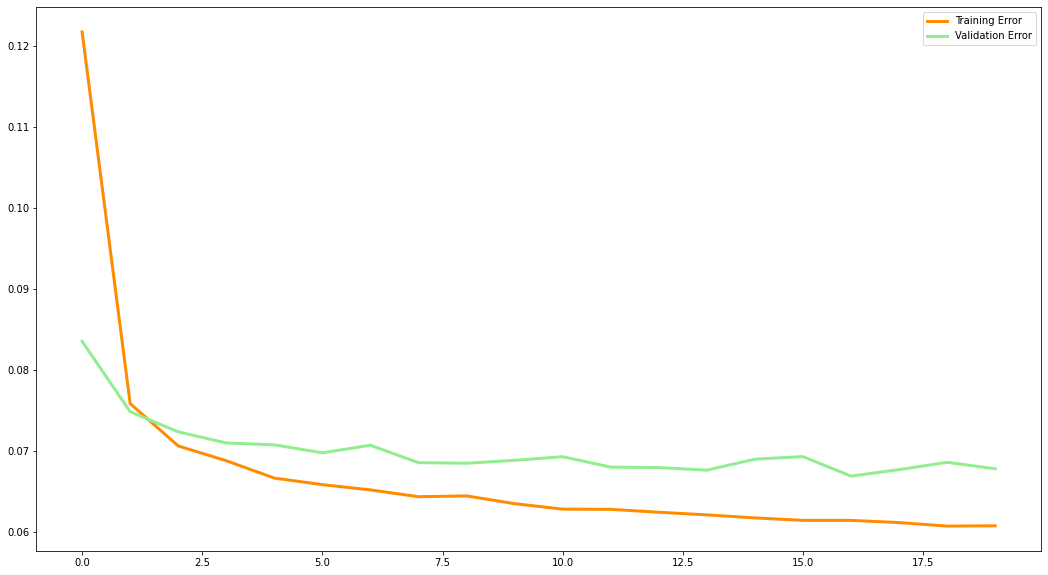

In [56]:
plotNN(complex_NN)

## Testing and Evaluation

In [57]:
model_single_neuron.evaluate(xtest, ytest)

283/283 [==============================] - 0s 1ms/step - loss: 0.1577 - mse: 0.1577 - mae: 0.2343


[0.15771916508674622, 0.15771916508674622, 0.23427799344062805]

In [58]:
shallowNN.evaluate(xtest, ytest)

283/283 [==============================] - 0s 1ms/step - loss: 0.0716 - mse: 0.0716


[0.07160883396863937, 0.07160883396863937]

In [59]:
deepNN.evaluate(xtest, ytest)

283/283 [==============================] - 0s 1ms/step - loss: 0.0714 - mse: 0.0714


[0.07138876616954803, 0.07138876616954803]

In [60]:
complex_NN.evaluate(Xtest, Ytest)

283/283 [==============================] - 0s 1ms/step - loss: 0.0701 - mae: 0.1602


[0.07014778256416321, 0.16022789478302002]

In [61]:
complex_NN.predict(Xtest)

array([[1.0253087 ],
       [1.0346665 ],
       [0.934302  ],
       ...,
       [1.0878763 ],
       [1.0751436 ],
       [0.99455845]], dtype=float32)

In [ ]:
Ytest

,y_no,y_yes
3776,1,0
9928,1,0
33409,1,0
31885,1,0
15738,1,0
...,...,...
13353,1,0
38732,0,1
5654,1,0
3779,1,0
